# OCR Cookbook

---

## OCR Exploration and Structured Outputs
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model.

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Model Used
- Mistral OCR
- Pixtral 12B & Ministral 8B


## Setup

First, let's install `mistralai`.

In [1]:
# %%capture
# !pip install mistralai

## Mistral OCR with PDF

We will need to set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [2]:

import getpass
api_key = getpass.getpass("Enter your API key: ")

In [3]:
# Initialize Mistral client with API key
from mistralai import Mistral

# api_key = "API_KEY" # Replace with your API key
client = Mistral(api_key=api_key)

Example text api call

In [10]:
import os
from mistralai import Mistral

model = "mistral-large-latest"

client = Mistral(api_key=api_key)

chat_response = client.chat.complete(
    model = model,
    messages = [
        {
            "role": "system",
            "content": "Answer in less than 2 words",
        },
        {
            "role": "user",
            "content": "What is world peace?",
        },
    ]
)

print(chat_response.choices[0].message.content)

Elusive ideal


There are two types of files you can apply OCR to:
- 1. PDF files
- 2. Image files

Let's start with a PDF file:

In [11]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Verify PDF file exists
pdf_file = Path("../data/2307.16832v1.pdf")
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "# Metric@CustomerN: Evaluating Metrics at a Customer Level in E-Commerce \n\nDiscussion Paper<br>Mayank Singh ${ }^{1}$, Emily Ray ${ }^{1}$, Marc Ferradou ${ }^{1}$ and Andrea Barraza-Urbina ${ }^{1}$<br>${ }^{1}$ Grubhub, New York, USA\n\n\n#### Abstract\n\nAccuracy measures such as Recall, Precision, and Hit Rate have been a standard way of evaluating Recommendation Systems. The assumption is to use a fixed Top-N to represent them. We propose that median impressions viewed from historical sessions per diner be used as a personalized value for N . We present preliminary exploratory results and list future steps to improve upon and evaluate the efficacy of these personalized metrics.\n\n\n## Keywords\n\nRecommender Systems, Personalization, Fair Evaluation\n\n## 1. Introduction\n\nRecommender Systems (RS) are ubiquitous in e-commerce, from serving relevant ads to customers to helping them pick their favorite f

View the result with the following:

# Metric@CustomerN: Evaluating Metrics at a Customer Level in E-Commerce 

Discussion Paper<br>Mayank Singh ${ }^{1}$, Emily Ray ${ }^{1}$, Marc Ferradou ${ }^{1}$ and Andrea Barraza-Urbina ${ }^{1}$<br>${ }^{1}$ Grubhub, New York, USA


#### Abstract

Accuracy measures such as Recall, Precision, and Hit Rate have been a standard way of evaluating Recommendation Systems. The assumption is to use a fixed Top-N to represent them. We propose that median impressions viewed from historical sessions per diner be used as a personalized value for N . We present preliminary exploratory results and list future steps to improve upon and evaluate the efficacy of these personalized metrics.


## Keywords

Recommender Systems, Personalization, Fair Evaluation

## 1. Introduction

Recommender Systems (RS) are ubiquitous in e-commerce, from serving relevant ads to customers to helping them pick their favorite food. We have been evaluating these RS in the same manner for more than a decade using Metric@N[1, 2]; e.g. Recall@N and N takes a numeric value such as: $1,5,100$. Evaluating the performance of the system using a static N for all customers misses important nuances in their behavior on the platform[3]. Customer A might only look at the first 5 results on average but Customer B's average is 25 . The prevailing industry assumption is that displaying "best" results on top is the optimal solution for an online RS, but this may not hold universally[3]. Some customers might not click on the first result even if it is the most relevant, because they want to "explore" additional results before making a decision. In line with the goal of EvalRS2023[4]; we propose calculating a personalized evaluation metric at CustomerN instead of a static $N$ termed: Metric@CustomerN. One way of calculating CustomerN is to take the median of maximum impression ranks scrolled to in past sessions on the platform.

## 2. Related Work

To the best of our knowledge, there are no other texts that discuss the use of a dynamic $N$ value while calculating accuracy metrics to evaluate a RS. Giobergia[5] introduces "variance

[^0]
[^0]:    2nd Edition of EvalRS: a Rounded Evaluation of Recommender Systems, August 6-August 10, 2023, Long Beach, CA, USA (c) mayanksingh@grubhub.com (M. Singh); eray1@grubhub.com (E. Ray); mferradou@grubhub.com (M. Ferradou); abarraza@grubhub.com (A. Barraza-Urbina)
    (c) 0009-0005-5279-5049 (M. Singh); 0000-0002-9693-4996 (M. Ferradou); 0009-0001-0342-5181 (A. Barraza-Urbina)

    2023 Copyright for this paper by its authors. Use permitted under Creative Commons License Attribution 4.0 International (CC BY 4.0).
    $\square$ CEUR Workshop Proceedings (CEUR-WS.org)

agreement" to account for different user interests on a music streaming platform. Chia et al.[6] introduced RecList, to standardize behavioral metrics testing, and also introduce data slice-based evaluation. Similarly, Ekstrand et al.[7] break down users by demographic groups to understand if users from different groups obtain the same utility from RS. Kaminskas et al.[8] expand beyond accuracy measures and study the non-accuracy measures such as Diversity, Serendipity, Novelty, and Coverage and discuss their calculation. Sun[9] and Verachtert et al.[10] detail the importance of observing a global timeline while evaluating recommender models. Using impression data in RS improved the relevance of recommended results in [11, 12], we propose incorporating impression data in RS evaluation as well.

# 3. Metric@CustomerN 

The methodology to calculate Recall@Customer $N^{1}$ is detailed in the steps below:

1. For a customer $C_{i}$ in a set of customers $S$ we capture the max impression rank, $R_{i j}$, scrolled-to in each session $j$.
2. We calculate the median impression position for a customer for sessions browsed in the last $X$ days:

$$
N_{i}=\operatorname{median}\left(R_{i j}\right), \quad i \in\{1, S\}, \quad j \in\left\{1, p_{i}\right\}
$$

where $p_{i}$ denotes the number of sessions browsed by customer $C_{i}$ and $X$ is decided based on platform and analysis goals.
3. Now we can calculate the recall value for each customer denoted by: Recall@ $N_{i}$.
4. For a summarized view of how the recommendation algorithm performs, we use average Recall $@ N_{i}$ for all customers on the platform:

$$
\frac{1}{S} \sum_{i=1}^{S} \text { Recall }{ }_{i}, \quad i \in\{1, S\}
$$

## 4. Preliminary Analysis

Figure 1a shows significant variation in CustomerN, supporting the need for diner-specific N.
In Figure 1b and Figure 1c we observe that as the median impressions go up for a customer, so does the variance of their impressions viewed across sessions. Additionally, the CV value is higher for smaller CustomerN and stabilizes for diners with higher median impression views.

## 5. Discussion

Based on the findings from $[7,13,8]$ and other research on improving the evaluation of RS, it is clear that we are trying to understand how to better explain variability in customer behavior

[^0]
[^0]:    ${ }^{1}$ Recall is used as an example metric for representation. The same steps can be followed to calculate other similar metrics: Precision, Accuracy, Hit Rate, NDCG, etc.

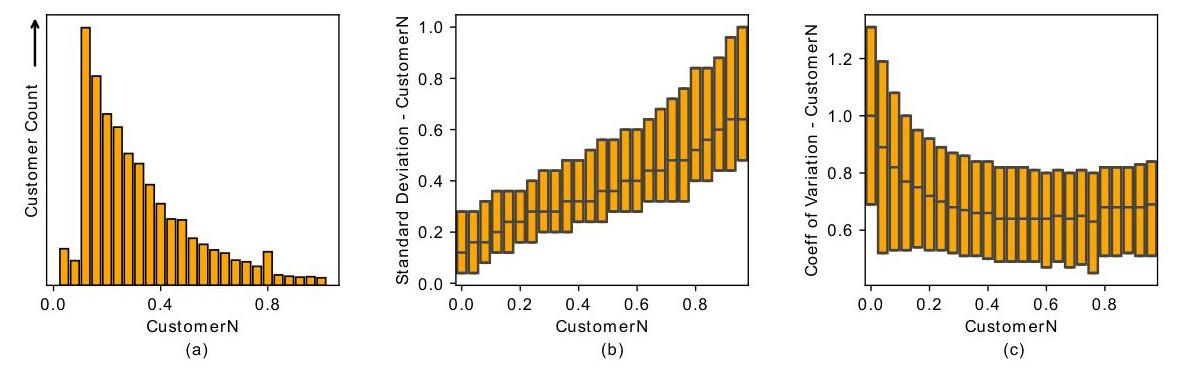

Figure 1: CustomerN variability across customers with 3+ sessions in the last 90 days on Grubhub. All Axes have been normalized by max CustomerN. Bars represent the inter-quartile range of $y$-axis values in (b) and (c)
on e-commerce platforms. As a future undertaking we would first compare the performance of popular RS algorithms on public[14, 15, 16] and proprietary datasets using Metric@CustomerN. Secondly, using median impressions viewed across all sessions as CustomerN has its limitations because it cannot account for additional variability within the same customer's sessions as seen in Figure 1. So we would like to segment customer sessions based on their mindset per session using same-session variables, historical activity, demographics, and geographical variables as detailed in $[17,18]$ and subsequently calculate CustomerN as median impressions viewed at the Customer-Segment level. Lastly, we will monitor long-term KPIs to validate if improved Metric@CustomerN correlates with customer satisfaction and lifetime value.

# 6. Conclusion 

Recent research $[11,12]$ has shown us that it's extremely valuable to incorporate customer impression data into an RS. Similarly, we propose using impression data to enhance the effectiveness of accuracy-based metrics. In our opinion, this approach has merit and warrants additional work to understand the implication of developing personalized calculations like Metrics@CustomerN for RS evaluation. The preliminary analysis we did points to the existing variability in customer behavior and to a need for a customer-centric evaluation of accuracy metrics. The methodology described in this paper is just the first step toward building a more personalized evaluation outlook for RS, we look forward to testing it out at EvalRS2023[4].

## Acknowledgments

We would like to thank Ruonan Ding for laying the foundation for this work and Fan Gong for their advice and feedback on the paper.

# References 

[1] J. L. Herlocker, J. A. Konstan, L. G. Terveen, J. T. Riedl, Evaluating collaborative filtering recommender systems, ACM Transactions on Information Systems (TOIS) 22 (2004) 5-53.
[2] P. Cremonesi, Y. Koren, R. Turrin, Performance of recommender algorithms on top-n recommendation tasks, in: Proceedings of the fourth ACM conference on Recommender systems, 2010, pp. 39-46.
[3] C. Hosey, L. Vujović, B. St. Thomas, J. Garcia-Gathright, J. Thom, Just give me what i want: How people use and evaluate music search, in: Proceedings of the 2019 chi conference on human factors in computing systems, 2019, pp. 1-12.
[4] F. Bianchi, P. J. Chia, C. Greco, C. Pomo, G. Moreira, D. Eynard, F. Husain, J. Tagliabue, Evalrs 2023. well-rounded recommender systems for real-world deployments, arXiv preprint arXiv:2304.07145 (2023).
[5] F. Giobergia, Triplet losses-based matrix factorization for robust recommendations, arXiv preprint arXiv:2210.12098 (2022).
[6] P. J. Chia, J. Tagliabue, F. Bianchi, C. He, B. Ko, Beyond ndcg: behavioral testing of recommender systems with reclist, in: Companion Proceedings of the Web Conference 2022, 2022, pp. 99-104.
[7] M. D. Ekstrand, M. Tian, I. M. Azpiazu, J. D. Ekstrand, O. Anuyah, D. McNeill, M. S. Pera, All the cool kids, how do they fit in?: Popularity and demographic biases in recommender evaluation and effectiveness, in: Conference on fairness, accountability and transparency, PMLR, 2018, pp. 172-186.
[8] M. Kaminskas, D. Bridge, Diversity, serendipity, novelty, and coverage: a survey and empirical analysis of beyond-accuracy objectives in recommender systems, ACM Transactions on Interactive Intelligent Systems (TiiS) 7 (2016) 1-42.
[9] A. Sun, From counter-intuitive observations to a fresh look at recommender system, arXiv preprint arXiv:2210.04149 (2022).
[10] R. Verachtert, L. Michiels, B. Goethals, Are we forgetting something? correctly evaluate a recommender system with an optimal training window, in: Proceedings of the Perspectives on the Evaluation of Recommender Systems Workshop (PERSPECTIVES) at RecSys22, Seattle, WA, USA, 2022.
[11] F. B. Perez Maurera, M. Ferrari Dacrema, P. Cremonesi, Towards the evaluation of recommender systems with impressions, in: Proceedings of the 16th ACM Conference on Recommender Systems, 2022, pp. 610-615.
[12] M. Aharon, Y. Kaplan, R. Levy, O. Somekh, A. Blanc, N. Eshel, A. Shahar, A. Singer, A. Zlotnik, Soft frequency capping for improved ad click prediction in yahoo gemini native, in: Proceedings of the 28th ACM International Conference on Information and Knowledge Management, 2019, pp. 2793-2801.
[13] Y. Ji, A. Sun, J. Zhang, C. Li, Do loyal users enjoy better recommendations? understanding recommender accuracy from a time perspective, in: Proceedings of the 2022 ACM SIGIR International Conference on Theory of Information Retrieval, 2022, pp. 92-97.
[14] F. Wu, Y. Qiao, J.-H. Chen, C. Wu, T. Qi, J. Lian, D. Liu, X. Xie, J. Gao, W. Wu, et al., Mind: A large-scale dataset for news recommendation, in: Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics, 2020, pp. 3597-3606.

[15] S. Eide, D. S. Leslie, A. Frigessi, J. Rishaug, H. Jenssen, S. Verrewaere, Finn. no slates dataset: A new sequential dataset logging interactions, all viewed items and click responses/noclick for recommender systems research, in: Proceedings of the 15th ACM Conference on Recommender Systems, 2021, pp. 556-558.
[16] F. B. Pérez Maurera, M. Ferrari Dacrema, L. Saule, M. Scriminaci, P. Cremonesi, Contentwise impressions: An industrial dataset with impressions included, in: Proceedings of the 29th ACM International Conference on Information \& Knowledge Management, 2020, pp. $3093-3100$.
[17] J. Cheng, C. Lo, J. Leskovec, Predicting intent using activity logs: How goal specificity and temporal range affect user behavior, in: Proceedings of the 26th International Conference on World Wide Web Companion, 2017, pp. 593-601.
[18] J. Garcia-Gathright, B. St. Thomas, C. Hosey, Z. Nazari, F. Diaz, Understanding and evaluating user satisfaction with music discovery, in: The 41st International ACM SIGIR Conference on Research \& Development in Information Retrieval, 2018, pp. 55-64.

In [12]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))

## Mistral OCR with Image

In addition to the PDF file shown above, Mistral OCR can also process image files:

In [13]:
import base64

# Verify image exists
image_file = Path("../data/metrics_customern_chart.png")
assert image_file.is_file()

# Encode image as base64 for API
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Process image with OCR
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert response to JSON
response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "![img-0.jpeg](img-0.jpeg)",
            "images": [
                {
                    "id": "img-0.jpeg",
                    "top_left_x": 51,
                    "top_left_y": 10,
                    "bottom_right_x": 1026,
                    "bottom_right_y": 321,
                    "image_base64": null
                }
            ],
            "dimensions": {
                "dpi": 200,
                "height": 338,
                "width": 1028
            }
        }
    ],
    "model": "mistral-ocr-2503-completion",
    "usage_info": {
        "pages_processed": 1,
        "doc_size_bytes": 56262
    }
}


## Extract structured data from OCR results

OCR results can be further processed using another model.

Our goal is to extract structured data from these results. To achieve this, we will utilize the `pixtral-12b-latest` model, supported by our OCR model, to deliver better and higher-quality answers:

In [14]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))

{
    "image": "img-0.jpeg",
    "charts": [
        {
            "label": "a",
            "x_label": "CustomerN",
            "y_label": "Customer Count",
            "description": "Histogram showing the distribution of CustomerN with Customer Count"
        },
        {
            "label": "b",
            "x_label": "CustomerN",
            "y_label": "Standard Deviation - CustomerN",
            "description": "Histogram showing the standard deviation of CustomerN"
        },
        {
            "label": "c",
            "x_label": "CustomerN",
            "y_label": "Coeff of Variation - CustomerN",
            "description": "Histogram showing the coefficient of variation of CustomerN"
        }
    ]
}


In the example above, we are leveraging a model already capable of vision tasks.

However, we could also use text-only models for the structured output. Note in this case, we do not include the image in the user message:

In [15]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))


{
    "image": "img-0.jpeg"
}


## All Together - Mistral OCR + Custom Structured Output
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: str  # string
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/).

In [16]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64


class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: str
    ocr_contents: dict

def structured_ocr(image_path: str) -> StructuredOCR:
    """
    Process an image using OCR and extract structured data.

    Args:
        image_path: Path to the image file to process

    Returns:
        StructuredOCR object containing the extracted data

    Raises:
        AssertionError: If the image file does not exist
    """
    # Validate input file
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(
        document=ImageURLChunk(image_url=base64_data_url),
        model="mistral-ocr-latest"
    )
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        f"This is the image's OCR in markdown:\n{image_ocr_markdown}\n.\n"
                        "Convert this into a structured JSON response "
                        "with the OCR contents in a sensible dictionnary."
                        )
                    )
                ]
            }
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

We can now extract structured output from any image parsed with our OCR model.

In [17]:
# Example usage
image_path = "../data/metrics_customern_chart.png" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())
print(json.dumps(response_dict, indent=4))

{
    "file_name": "img-0.jpeg",
    "topics": [
        "Data Visualization",
        "Customer Analysis",
        "Statistical Charts"
    ],
    "languages": "English",
    "ocr_contents": {
        "image_description": "Three bar charts are displayed. The first chart (a) shows the distribution of Customer Count against CustomerN. The second chart (b) shows the Standard Deviation of CustomerN against CustomerN. The third chart (c) shows the Coefficient of Variation of CustomerN against CustomerN."
    }
}


The original image for comparison can be found below.

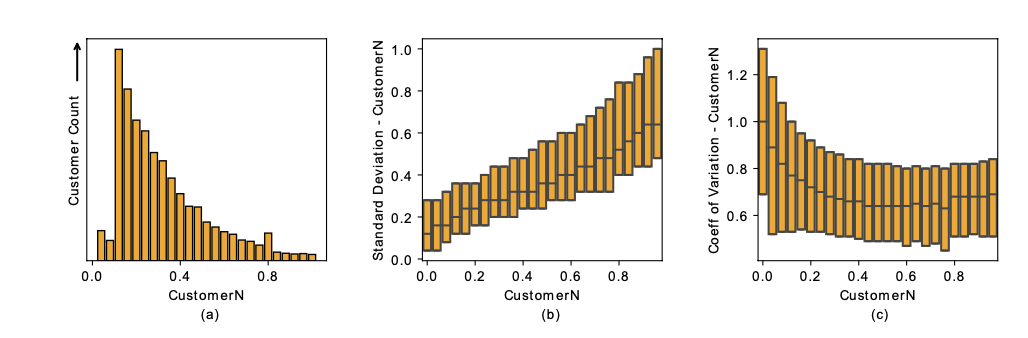

In [19]:
from PIL import Image

image = Image.open(image_path)
image.resize((image.width, image.height))
